## Step 1 - Import Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch # Build dendogram
from sklearn.metrics import silhouette_score # Silhouette Coefficient
from sklearn.cluster import AgglomerativeClustering  # Build Cluster using Agglomerative Method

## Step 2 - Loading Dataset

In [2]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Inspect info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Step 3 - Slicing Dataset by Anuual Income and Spending Score

In [3]:
# Slicing - Select Annual Income and Spending Score only
X = df.iloc[:, [3, 4]].values  # property values will take only the 'values' -> return in ndarray


## Step 4 - Dendrogram Visualization

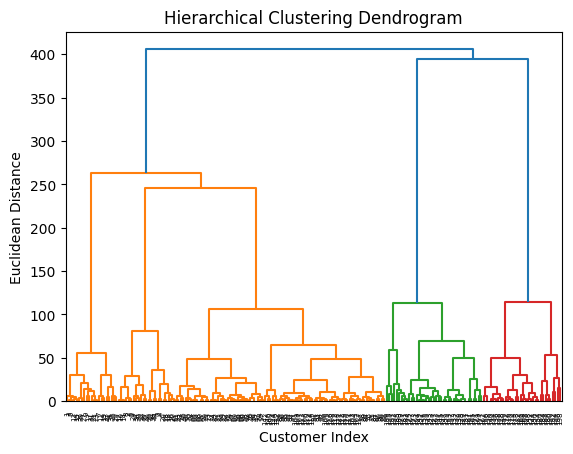

In [4]:
# Construct a dendrogram using the Ward linkage method
# The 'ward' method minimizes the variance within each cluster as they are merged
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

linkage_matrix = sch.linkage(X, method="ward")   # Compute the hierarchical clustering linkage matrix
dendrogram = sch.dendrogram(linkage_matrix)      # Generate the dendrogram visualization

# Display the dendrogram plot
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Euclidean Distance")
plt.show()


## Step 5 - Creating Agglomerative Model

In [5]:
# Create a hierarchical clustering model with 5 clusters
hc = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")

# Fit the model and get the cluster labels for each data point
y_hc = hc.fit_predict(X)


## Step 6 - Clustering Visualization 

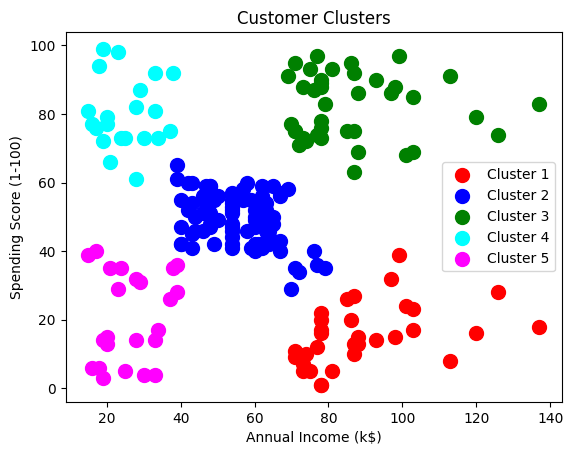

In [6]:
# Show the result of clustering using a scatter plot
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c="green", label="Cluster 3")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c="magenta", label="Cluster 5")

# Add titles and labels
plt.title("Customer Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


## Step 7 - Clustering Result Evaluation

In [7]:
# Evaluate how good the clustering result is using the silhouette score
silhouette_avg = silhouette_score(X, y_hc)

# Print the average silhouette score
print(f"Silhouette Coefficient: {silhouette_avg}")


Silhouette Coefficient: 0.5529945955148897
